# Principal Component Analysis (PCA)  
**Principal Component Analysis** (PCA) is used in exploratory data analysis and for multidimensionality reduction. The main idea is to project data points onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data’s variation as possible. In other words, using PCA we remove the redundant and highly-correlated data and we keep only the most significant data features for further analysis.

The first principal component is defined as a direction that maximizes variance of the projected data, the second principal component is a direction orthogonal to the first principal component that is the next one to maximize the variance, etc. It can be proved that the principal components are the eigenvectors of the covariance matrix and are computed either by eigendecomposition of the covariance matrix or by the SVD of the data matrix.

Assume we have data consisting of $m$ variables (or features, or attributes, such as age, height, weight, income, etc.) and n observations (or data points, or samples). We form the $m \times n$ ”feature - observation” matrix where variables are listed in the rows and observations in the columns. Some authors and Python prefer ”observation – feature” matrix instead of ”feature – observation” matrix. 

![alt](https://blog.bioturing.com/wp-content/uploads/2018/11/Blog_pca_6b.png)  

---

The goal of PCA is to reduce the dimensionality of the feature vectors used in training machine learning algorithms. The steps in PCA are:

1. **Stadardize (center and scale) the data.** 

To center the data, we average each row by replacing the value $x$ by 
$$
x - \text{mean}
$$
Data values may have vastly different ranges, and so, to ensure that PCA is not selecting wrong directions in describing data variation, we also divide by the standard deviation. That is, we scale the data in each variable by finding the *$z$-scores*:

$$
z = \frac{x - \text{mean}}{\text{standard devation}}
$$

Finally, we form the $m\times n$ matrix $A$. 

2. **Compute the covariance or correlation matrix**:

$$
S = \frac{1}{n-1}AA^T
$$

If we are working with only centered data, the above matrix is the covariance matrix, and if we are working with scaled data, then $S$ is the correlation matrix. The entries on the diagonal are the variances (or correlations) for each variable and the off-diagonal entries are the covariances (or correlations) between two variables: positive covariance indicates that the variables are directly related (when one increases, the other increases as well), negative covariance indicates inverse relationship (when one increases, the other decreases). This matrix is symmetric of size $m \times m$, so its columns are of the same size as the columns of $A$.

3. **Find the eigenvalues and the orthonormal eigenvectors of $S$.** 

These eigenvectors are columns of the matrix $U$ in the singular value decomposition of $A$, up to the factor $n-1$. Further, we denote the eigenvalues by $\sigma_{i}^{2}$. This is equivalent to the **Singular Value Decomposition** of our shifted training set matrix $A$,

$$
A = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^{T}, 
$$




---
---


4. **Find the principal components.**

We arrange the eigenvalues found in the previous step in the decreasing order. The first principal component $PC_1$ is in the direction of the 1st eigenvector, the second principal component $PC_2$ is in the direction of the 2nd eigenvector, etc. The entries of each $PC_i$ are called *loading scores* and they tell us how the $PC_i$ is a linear combination of features.

5. **Reduce the dimension of the data.**

We project data points (i.e., columns of $A$) onto the selected principal components (i.e., several eigenvectors of $S$). By the Eckart-Young theorem we know that the line closest to the data points is in the direction of $PC_1$, etc (”closest” is in the sense of perpendicular least squares).

In addition, the total variance, which is the trace of $S$, is

$$
T = \text{trace}(S) = \frac{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}{n-1},
$$

and the $i$-th principle component $PC_i$ explains

$$
\frac{\sigma_{i}^{2}/(n-1)}{T} = \frac{\sigma_{i}^{2}}{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}
$$

of the total variation. We use a scree plot to graph the percentages of variation that each $PC_i$ accounts for. Also, the sum of squared distances from the points projected to $PC_i$ to the origin is the eigenvalue for $PC_i$ or the squared singular value $\sigma_{i}^{2}$.




---


To project the data contained in $A$ onto the first two principle component axis, we compute $A [PC_1 PC_2]$.




---

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()
df = pd.read_csv("Datasets/palmer_penguins.csv")
df = df.dropna()
df = df.loc[~df.index.duplicated()]
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
y=df.species.to_numpy()

In [37]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (333, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 



In [38]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



In [39]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

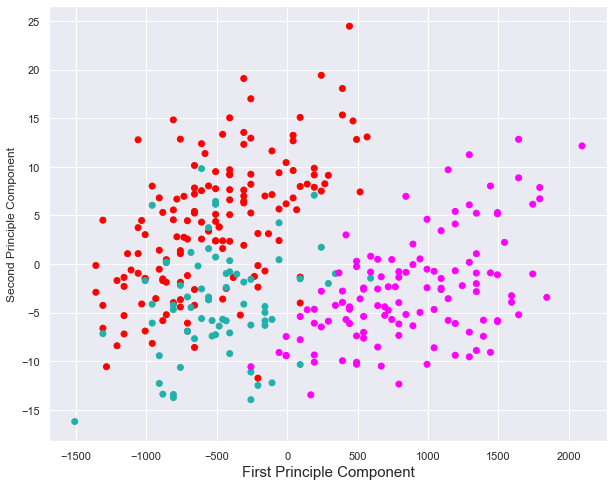

In [40]:
def colors(y):
    if y == "Adelie":
        return "red"
    elif y == "Gentoo":
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()


In [41]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68633893 0.19452929 0.09216063 0.02697115]
per_var = [68.63 19.45  9.22  2.7 ] 



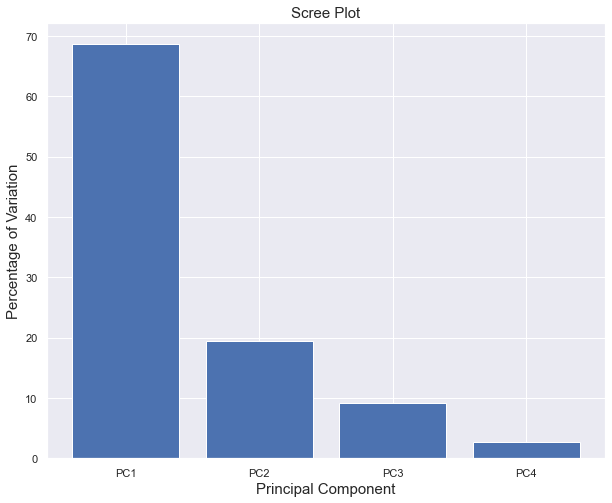

In [42]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [44]:
pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4
0,-1.853593,0.032069,-0.234902,0.528397
1,-1.316254,-0.443527,-0.027470,0.401727
2,-1.376605,-0.161230,0.189689,-0.528662
3,-1.885288,-0.012351,-0.628873,-0.472893
4,-1.919981,0.817598,-0.701051,-0.196416
...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892
329,1.832651,-0.784510,0.240758,-0.008955
330,2.751505,0.266556,-0.419306,0.236256
331,1.713854,-0.725875,-0.262764,0.330004


In [46]:
projected_df = pd.concat([pca_df, df.species], axis = 1)
projected_df

,PC1,PC2,PC3,PC4,species
0,-1.853593,0.032069,-0.234902,0.528397,Adelie
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie
3,-1.885288,-0.012351,-0.628873,-0.472893,NaN
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie
...,...,...,...,...,...
338,NaN,NaN,NaN,NaN,Gentoo
340,NaN,NaN,NaN,NaN,Gentoo
341,NaN,NaN,NaN,NaN,Gentoo
342,NaN,NaN,NaN,NaN,Gentoo


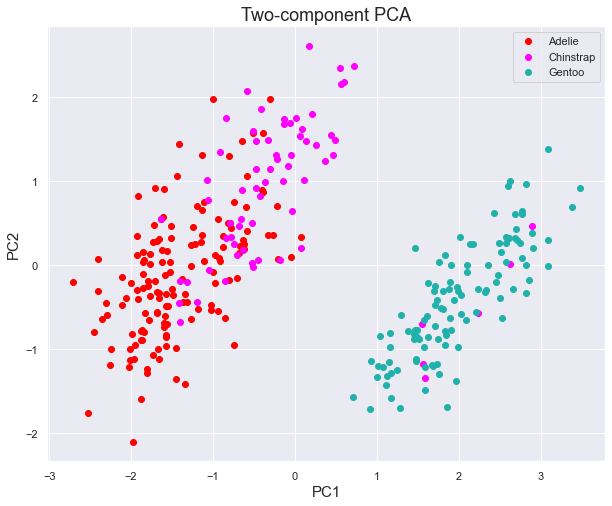

In [48]:
targets = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

In [50]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame = True)
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [52]:
features = wine["feature_names"]
features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [53]:
targets = wine["target_names"]
targets

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [58]:
wine_df = wine["frame"]
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [60]:
X = wine_df[features].to_numpy()
scaled_X = preprocessing.scale(X)
scaled_X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [61]:
pca = PCA()   # perform PCA and get 30 new coordinates that we call principal components (PCs)
pca.fit(scaled_X)


print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
per_var = [36.2  19.21 11.12  7.07  6.56  4.94  4.24  2.68  2.22  1.93  1.74  1.3
  0.8 ] 



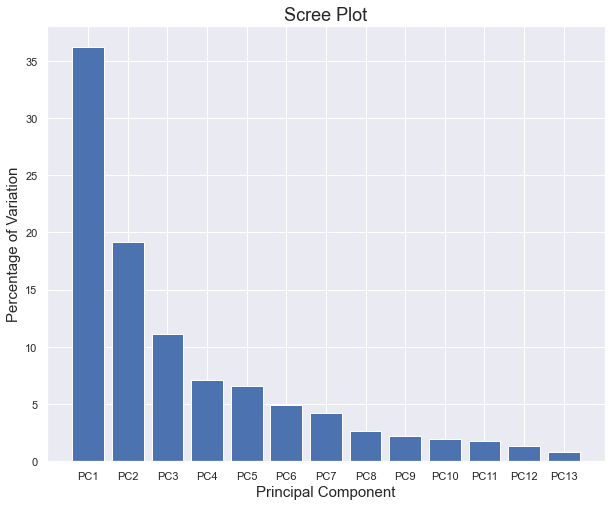

In [63]:
labels = [f"PC{i}" for i in range(1,14)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 14), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 18)
plt.show()

In [65]:
labels = [f"PC{i}" for i in range(1, 14)]

pd.DataFrame(pca.components_, columns = labels, index = wine['feature_names'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
malic_acid,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
ash,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
alcalinity_of_ash,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
magnesium,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
total_phenols,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
flavanoids,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
nonflavanoid_phenols,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
proanthocyanins,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
color_intensity,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


In [66]:
pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


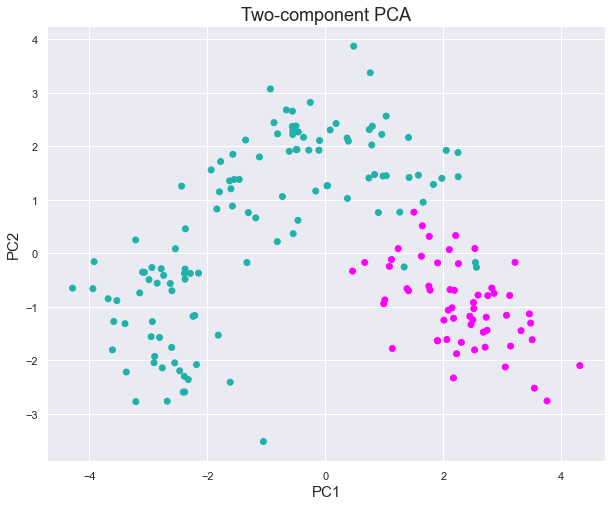

In [67]:
def color(label):
    if label == 0:
        return "magenta"
    else:
        return "lightseagreen"

colors = [color(label) for label in cancer_df["target"]]

plt.figure(figsize = (10, 8))
plt.scatter(pca_df.PC1, pca_df.PC2, c = colors)
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("Two-component PCA", fontsize = 18)
plt.show()

In [68]:
color(1)

'lightseagreen'